# General Visualizations for Report and Video

In [82]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplot2tikz


In [83]:
# Path to your event files
experiment_path = "../../runs/sac/experiment_11/*/events.*"
event_files = glob.glob(experiment_path, recursive=True)

all_data = []

for file in event_files:
    print(file)
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })

df = pd.DataFrame(all_data)
print(df.head())

../../runs/sac/experiment_11\sac_0.0_True_200000_1771974840\events.out.tfevents.1771974840.tcml-node39.1026907.0
../../runs/sac/experiment_11\sac_0.1_True_200000_1771972390\events.out.tfevents.1771972390.tcml-node39.1023695.0
../../runs/sac/experiment_11\sac_0.2_True_200000_1771972390\events.out.tfevents.1771972390.tcml-node39.1023690.0
../../runs/sac/experiment_11\sac_0.3_True_200000_1771972390\events.out.tfevents.1771972390.tcml-node39.1023700.0
                                                file  \
0  events.out.tfevents.1771974840.tcml-node39.102...   
1  events.out.tfevents.1771974840.tcml-node39.102...   
2  events.out.tfevents.1771974840.tcml-node39.102...   
3  events.out.tfevents.1771974840.tcml-node39.102...   
4  events.out.tfevents.1771974840.tcml-node39.102...   

                                                path                     tag  \
0  ../../runs/sac/experiment_11\sac_0.0_True_2000...  charts/episodic_return   
1  ../../runs/sac/experiment_11\sac_0.0_True_2000..

In [84]:
def plot_tag(df, tag):
    df_filtered = df[df['tag'] == tag]
    df_filtered = df_filtered[["path", "step", "value"]]
    df_filtered["path"] = df_filtered["path"].str.slice(26, 50)
    print(df_filtered.head())
    df_filtered["value_smooth"] = (
        df_filtered.groupby("path")["value"]
        .rolling(window=int(1e3), min_periods=int(1))
        .mean()
        .reset_index(level=0, drop=True)
    )
    df_filtered["group key"] = df_filtered["path"]
    df_downsampled = df_filtered.iloc[::100, :]
    fig, ax = plt.subplots()
    colors = ["black", "gray", "rosybrown", "lightcoral", "firebrick", "red", "peru", "darkorange", "goldenrod", "palegoldenrod", "yellow", "olive", "greenyellow", "darkseagreen", "turquoise", "teal", "indigo"]
    for index, g in enumerate(df_downsampled.groupby("group key")):
        ax.plot(g[1]["step"], g[1]["value_smooth"], label=g[0].replace("_", "\\_"), color=colors[index])
    ax.grid()
    fig.set_size_inches(20, 10)
    plt.xlabel("Global Step")
    plt.ylabel(tag)
    plt.legend()
    plt.show()
    return fig

                        path  step      value
0   11\sac_0.0_True_200000_1    27 -10.987159
5   11\sac_0.0_True_200000_1    28 -10.756146
10  11\sac_0.0_True_200000_1    29 -11.081484
15  11\sac_0.0_True_200000_1    31 -10.726612
20  11\sac_0.0_True_200000_1    33 -10.819357


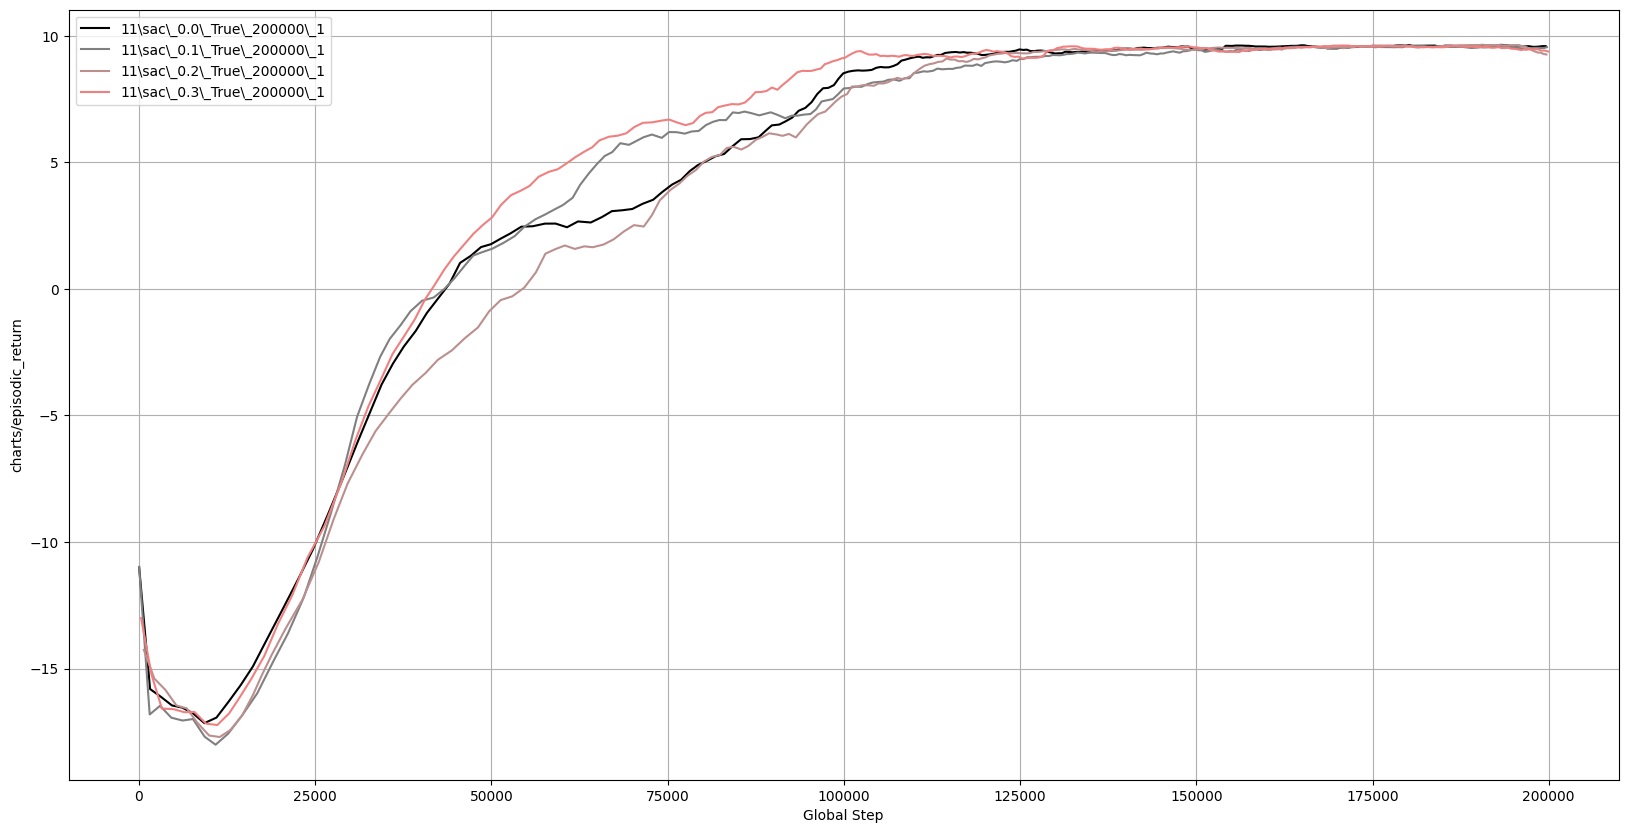

In [85]:
fig = plot_tag(df, "charts/episodic_return")

Empty DataFrame
Columns: [path, step, value]
Index: []


C:\Users\below\AppData\Local\Temp\ipykernel_20556\598594737.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


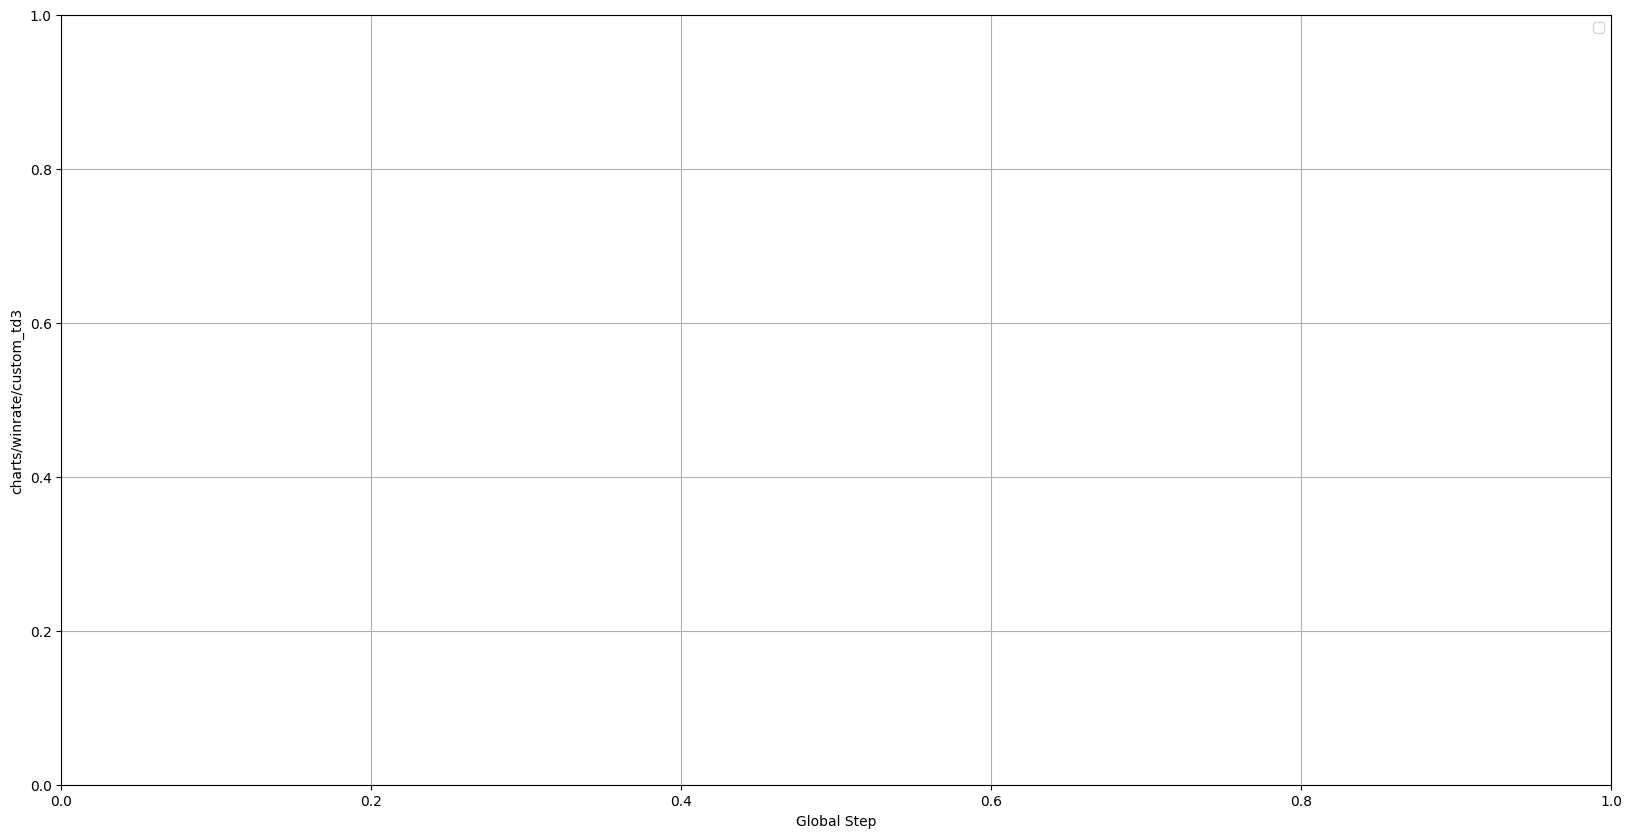

In [86]:
fig = plot_tag(df, "charts/winrate/custom_td3")

**RedQ Experiment**

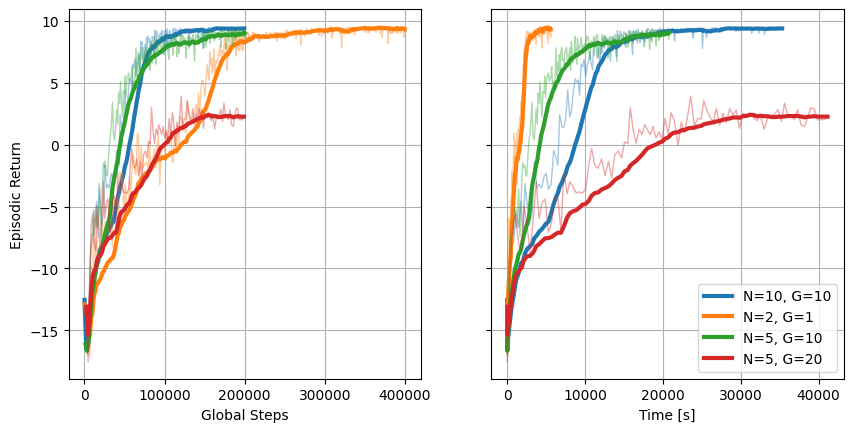

In [87]:
# Path to your event files
experiment_path = "../../runs/sac/experiment_9/*/events.*"
event_files = glob.glob(experiment_path, recursive=True)

all_data = []

for file in event_files:
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })
tab10 = plt.get_cmap('tab10')
df = pd.DataFrame(all_data)
dfs_res = []
x_labels = ["Global Steps", "Time [s]"]
line_labels = ["N=10, G=10", "N=2, G=1", "N=5, G=10", "N=5, G=20"]
for tag in ["charts/episodic_return", "charts/time_return"]:
    df_filtered = df[df['tag'] == tag]
    df_filtered = df_filtered[["path", "step", "value"]]
    df_filtered["path"] = df_filtered["path"].str.slice(28, 50)
    df_filtered["value_smooth"] = (
        df_filtered.groupby("path")["value"]
        .rolling(window=int(1e3), min_periods=int(1))
        .mean()
        .reset_index(level=0, drop=True)
    )
    df_filtered["value_semi_smooth"] = (
    df_filtered.groupby("path")["value"]
    .rolling(window=int(5e1), min_periods=int(1))
    .mean()
    .reset_index(level=0, drop=True)
    )


    
    df_filtered["group key"] = df_filtered["path"]
    df_downsampled = df_filtered.iloc[::50, :]
    dfs_res.append(df_downsampled)
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_figwidth(10)
ax[0].set_ylabel("Episodic Return")
for i in range(2):
    for index, g in enumerate(dfs_res[i].groupby("group key")):
        ax[i].plot(g[1]["step"], g[1]["value_smooth"], label=line_labels[index], color=tab10(index), linewidth=3)
        ax[i].plot(g[1]["step"], g[1]["value_semi_smooth"], linewidth=1, color=tab10(index), alpha=0.4)
        ax[i].set_xlabel(x_labels[i])
        ax[i].grid(True)
plt.legend()
plt.show()


In [88]:
#fig.savefig("exp_time.png")
matplot2tikz.save("exp_time.tikz", figure=fig)

**Entropy Experiment**

../../runs/sac/experiment_13\sac_0.0_False_200000_1772055067\events.out.tfevents.1772055067.tcml-node40.3725041.0
../../runs/sac/experiment_13\sac_0.0_True_200000_1772057103\events.out.tfevents.1772057103.tcml-node40.3731087.0
../../runs/sac/experiment_13\sac_0.1_False_200000_1772055067\events.out.tfevents.1772055067.tcml-node40.3725085.0
../../runs/sac/experiment_13\sac_0.2_False_200000_1772055067\events.out.tfevents.1772055067.tcml-node40.3725055.0
../../runs/sac/experiment_13\sac_0.3_False_200000_1772055067\events.out.tfevents.1772055067.tcml-node40.3725032.0
                        path  step      value
0   13\sac_0.0_False_200000_    37 -10.817412
5   13\sac_0.0_False_200000_   115 -15.167775
10  13\sac_0.0_False_200000_   223 -15.928246
15  13\sac_0.0_False_200000_   250 -10.919964
20  13\sac_0.0_False_200000_   288 -25.876148


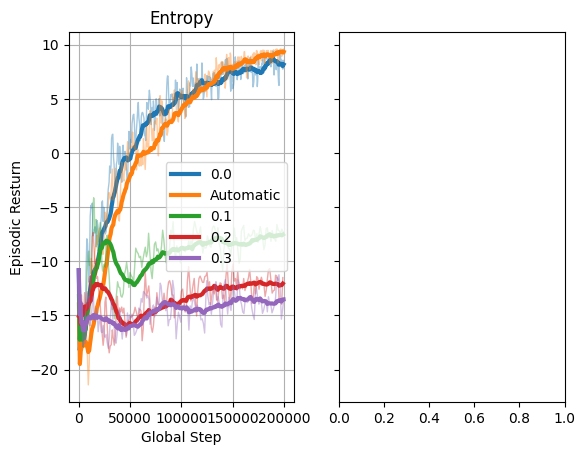

In [106]:
experiment_path = "../../runs/sac/experiment_13/*/events.*"
event_files = glob.glob(experiment_path, recursive=True)
tag = "charts/episodic_return"
all_data = []

for file in event_files:
    print(file)
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })
df = pd.DataFrame(all_data)
df_filtered = df[df['tag'] == tag]
df_filtered = df_filtered[["path", "step", "value"]]
df_filtered["path"] = df_filtered["path"].str.slice(26, 50)
print(df_filtered.head())
df_filtered["value_smooth"] = (
    df_filtered.groupby("path")["value"]
    .rolling(window=int(5e2), min_periods=int(1))
    .mean()
    .reset_index(level=0, drop=True)
)
df_filtered["value_semi_smooth"] = (
    df_filtered.groupby("path")["value"]
    .rolling(window=int(5e1), min_periods=int(1))
    .mean()
    .reset_index(level=0, drop=True)
)


tab10 = plt.get_cmap('tab10')
df_filtered["group key"] = df_filtered["path"]
df_filtered = df_filtered[df_filtered["step"] <= 300000]
df_downsampled = df_filtered.iloc[::20, :]
line_labels = ["0.0", "Automatic", "0.1", "0.2", "0.3"]

fig, ax = plt.subplots(ncols=2, sharey=True)
for index, g in enumerate(df_downsampled.groupby("group key")):
    ax[0].plot(g[1]["step"], g[1]["value_smooth"], label=line_labels[index], color=tab10(index), linewidth=3)
    ax[0].plot(g[1]["step"], g[1]["value_semi_smooth"], linewidth=1, color=tab10(index), alpha=0.4)

ax[0].grid(True)
ax[0].set_xlabel("Global Step")
ax[0].set_ylabel("Episodic Resturn")
ax[0].set_title("Entropy")
ax[0].legend()


**Colored Noise Experiment**

In [107]:
experiment_path = "../../runs/sac/experiment_3/plot/*/events.*"
event_files = glob.glob(experiment_path, recursive=True)
tag = "charts/episodic_return"
all_data = []

for file in event_files:
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })
df = pd.DataFrame(all_data)
df_filtered = df[df['tag'] == tag]
df_filtered = df_filtered[["path", "step", "value"]]
df_filtered["path"] = df_filtered["path"].str.slice(26, 50)
print(df_filtered.head())
df_filtered["value_smooth"] = (
    df_filtered.groupby("path")["value"]
    .rolling(window=int(5e2), min_periods=int(1))
    .mean()
    .reset_index(level=0, drop=True)
)

df_filtered["value_semi_smooth"] = (
    df_filtered.groupby("path")["value"]
    .rolling(window=int(5e1), min_periods=int(1))
    .mean()
    .reset_index(level=0, drop=True)
)

df_filtered["group key"] = df_filtered["path"]
df_filtered = df_filtered[df_filtered["step"] <= 300000]
df_downsampled = df_filtered.iloc[::40, :]
line_labels = ["0", "1", "2", "Automatic"]

tab10 = plt.get_cmap('tab10')

for index, g in enumerate(df_downsampled.groupby("group key")):
    ax[1].plot(g[1]["step"], g[1]["value_smooth"], label=line_labels[index], color=tab10(index), linewidth=3)
    ax[1].plot(g[1]["step"], g[1]["value_semi_smooth"], linewidth=1, color=tab10(index), alpha=0.4)
ax[1].grid(True)
ax[1].set_xlabel("Global Step")
ax[1].set_title("Colored Noise")
ax[1].legend()
fig.show()

                       path  step      value
0  3/plot\sac_0.0_False_0.0    73 -12.537189
2  3/plot\sac_0.0_False_0.0   118 -13.255663
4  3/plot\sac_0.0_False_0.0   132   6.661013
6  3/plot\sac_0.0_False_0.0   165 -12.335249
8  3/plot\sac_0.0_False_0.0   235 -19.107708


C:\Users\below\AppData\Local\Temp\ipykernel_20556\2617758692.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [108]:
matplot2tikz.save("exp_entropy_noise.tikz", figure=fig)
#fig.savefig("exp_entropy_noise.png")
